In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import preprocessing

In [179]:
boston = datasets.load_boston()
df1 = pd.DataFrame(boston.data)

In [180]:
df1.columns = boston.feature_names
df1['Price'] = boston.target

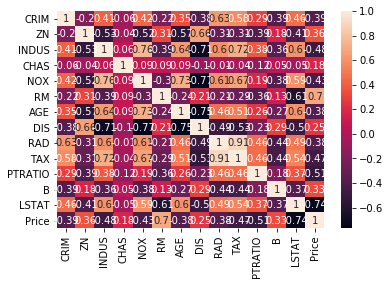

In [181]:
import seaborn as sns
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,)

In [182]:
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS','AGE','CRIM','B','PTRATIO','CHAS','ZN']
df = df1.drop(columns=columns)
features = df

In [183]:
df

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [184]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(features)

In [185]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(targets)

In [186]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,training_scores_encoded,test_size = 0.30, random_state= 250)

In [162]:
rand_clf = RandomForestClassifier(random_state=6)

In [163]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [164]:
rand_clf.score(x_train,y_train)

1.0

In [165]:
rand_clf.score(x_test,y_test)

0.125

In [166]:
grid_param = {
    "n_estimators" : [5,20,15,25],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,6,1),
    'max_features' : ['auto','log2'],
    'bootstrap': [True]
}

In [167]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=3,n_jobs =-1,verbose = 3)

In [168]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


C:\Users\Vkannan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6),
                         'n_estimators': [5, 20, 15, 25]},
             verbose=3)

In [169]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 15}

In [170]:
rand_clf = RandomForestClassifier(criterion= 'gini',bootstrap='True',
 max_depth = 12,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 15,random_state=6)

In [171]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap='True', max_depth=12, min_samples_split=4,
                       n_estimators=15, random_state=6)

In [172]:
rand_clf.score(x_train,y_train)

0.9265536723163842

In [173]:
rand_clf.score(x_test,y_test)

0.13815789473684212

In [174]:
from sklearn.model_selection import KFold

In [188]:
kfold = KFold(n_splits=12)
kfold.get_n_splits(x_transform)

12

In [193]:
from statistics import mean
rndf = RandomForestClassifier(criterion= 'gini',bootstrap='True',
 max_depth = 12,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators = 15,random_state=3)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(x_transform):
    X_train, X_test = x_transform[train_index], x_transform[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = training_scores_encoded[train_index], training_scores_encoded[test_index] 
    rndf.fit(X_train,y_train)
    train_score_ = rndf.score(X_train,y_train)
    test_score_ =  rndf.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9028077753779697 and test score is :   0.046511627906976744
for k =  2
train_score is :   0.9222462203023758 and test score is :   0.27906976744186046
for k =  3
train_score is :   0.9202586206896551 and test score is :   0.21428571428571427
for k =  4
train_score is :   0.9331896551724138 and test score is :   0.16666666666666666
for k =  5
train_score is :   0.9461206896551724 and test score is :   0.09523809523809523
for k =  6
train_score is :   0.9525862068965517 and test score is :   0.14285714285714285
for k =  7
train_score is :   0.9267241379310345 and test score is :   0.11904761904761904
for k =  8
train_score is :   0.9073275862068966 and test score is :   0.047619047619047616
for k =  9
train_score is :   0.9375 and test score is :   0.2619047619047619
for k =  10
train_score is :   0.9482758620689655 and test score is :   0.0
for k =  11
train_score is :   0.9504310344827587 and test score is :   0.023809523809523808
for k =  12
train_score